
# Time Series

A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

In [1]:
#importing the necessary libraries
import pandas as pd #data manu
import numpy as np  #numerical python
import matplotlib.pyplot as plt #visua
import seaborn as sns #visu


from statsmodels.tsa.seasonal import seasonal_decompose  #we can see the trends,seasonalityy
from statsmodels.tsa.stattools import acf, pacf #autocor,partial auto cor
from statsmodels.tsa.arima_model import ARIMA #model

In [2]:
#loading the time series data
data = pd.read_csv('AirPassengers.csv')

In [3]:
#EDA on the time series data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.info() # checking the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe() # checking descrptive stats

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data['Month'] = pd.to_datetime(data['Month'])  #converting month column str to datetime
data.index = data['Month'] #making month column as a index column


In [8]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [13]:
#in our time series data we have one target col. and time variable .
#time series models generally work with one column
#so make month variable index
del data['Month']

KeyError: ignored

In [14]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

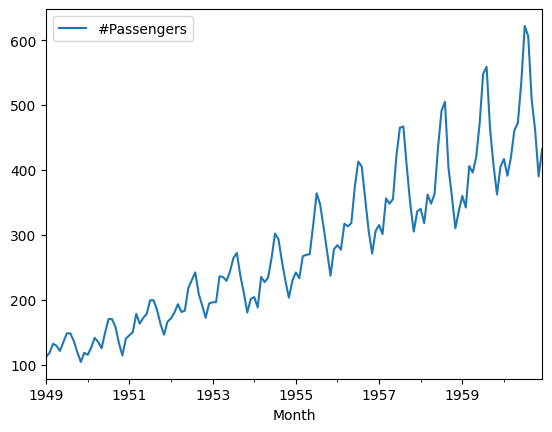

In [15]:
#plotting the time series

data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

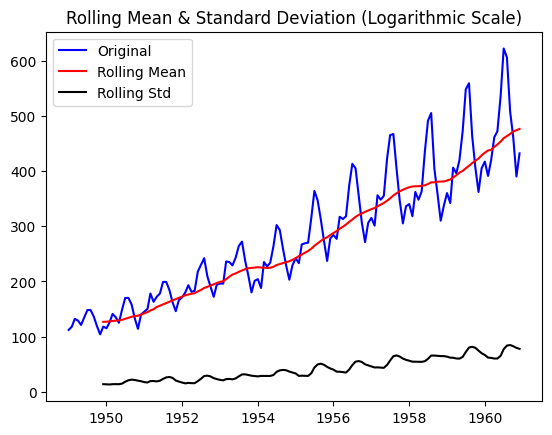

In [16]:
#To check whether our data is stationary or not
mean_log = data.rolling(window=12).mean()  #12 month averge(mean)
std_log = data.rolling(window=12).std()    #12 month devaiation from mean or (std)

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [17]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [18]:
std_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


In [26]:
#checking the stationarity of the series
#adfuller test if checking the data is stationarity or not( dicky fuller test)
#p -value < 0.05 . to reject null hypothesis
#it takes a auto regressive eqution - yt = c+beta*t + alpha*y(t-1) + pi*deltay(t-1)+et

from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'].diff().dropna())
result

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [20]:
p_value=result[1]
p_value

0.991880243437641

In [21]:
#interpret the p value
if p_value <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

NO Stationarity is present


In [29]:
#to make data stationary take first level difference
new_data = data['#Passengers'].diff().dropna()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

Example of log
1000,000=6
10^6

<Axes: xlabel='Month'>

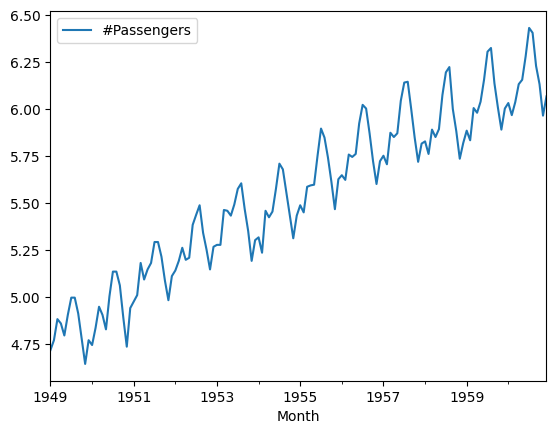

In [ ]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()   #droping the null value because with null value data is not loking good in graph
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

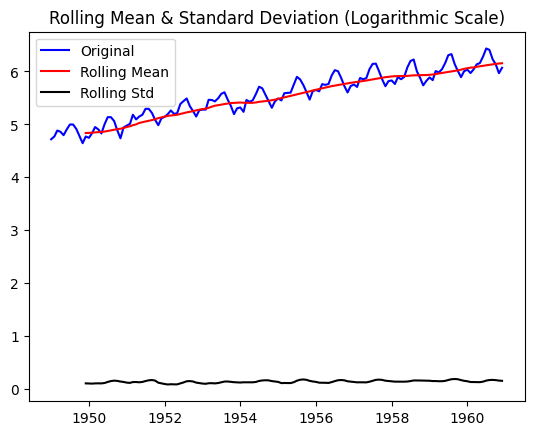

In [ ]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [28]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

NameError: ignored

In [30]:
#adfuller test for stationarity
result = adfuller(data['#Passengers'].diff().dropna())
print(result[1])

0.05421329028382478


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

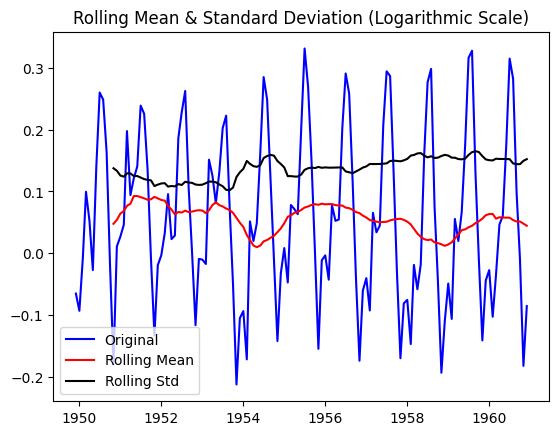

In [ ]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

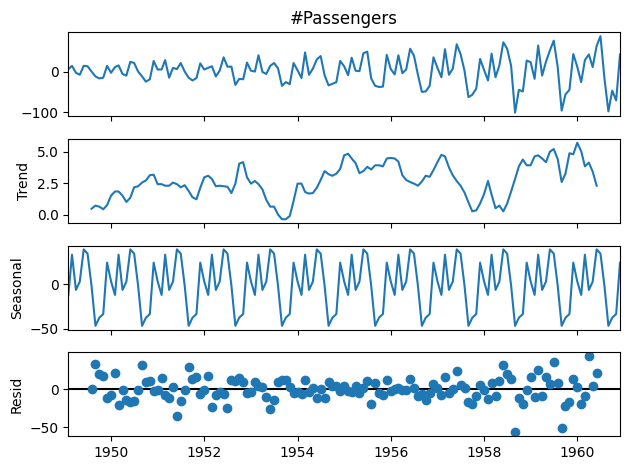

In [31]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].diff().dropna())

decompose_result.plot();

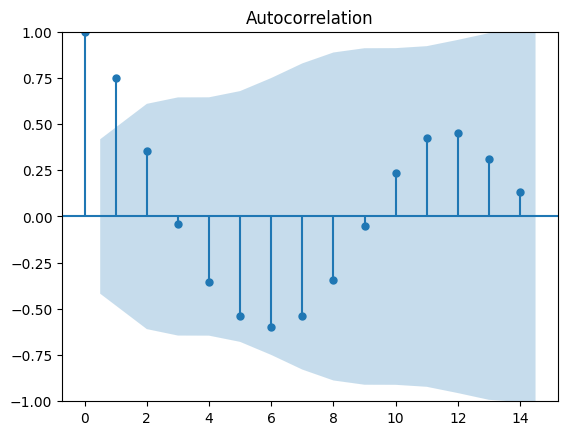

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(new_data)
plot_acf(acf_plot);


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
#AR+I+MA=AUTOREGRESSIVE(PAST)+INTERGRATED(SMOOTHING OUT)+MOVINGAVERAGE(Average of past data for a particular window)
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']
#we have to split data in series order not randomly . since each and every outcome depends on its previous values
model = ARIMA(train, order=(1,0,2))  #(p,d,q),p=autoregressive(lag factor),d=differencing(how many times we need to make differencing of data ),q=moving average(lag order)
#since we already did first level diferencing we given 0
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sat, 02 Sep 2023   AIC                           -225.803
Time:                        13:22:28   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

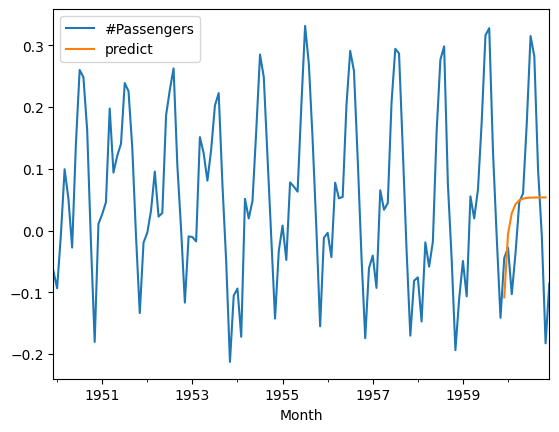

In [ ]:
new_data['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
#seasonality parameter
model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

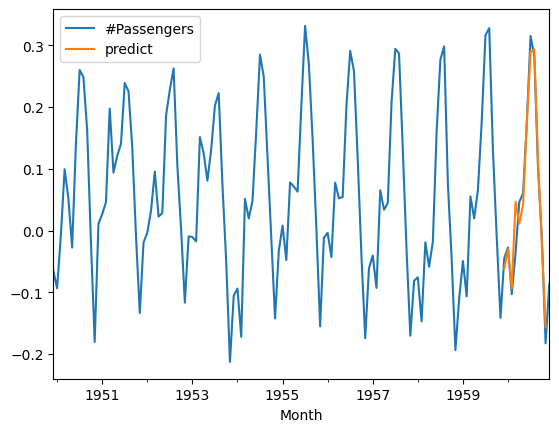

In [ ]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

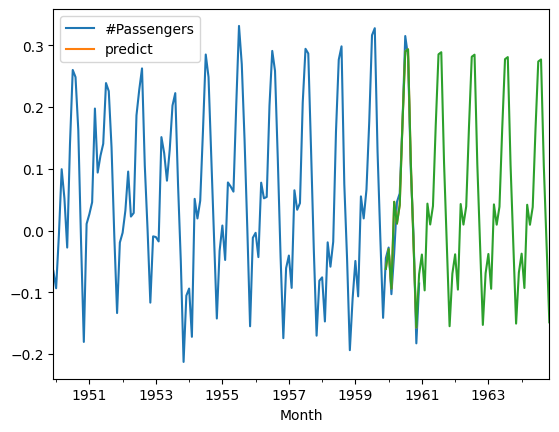

In [ ]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [ ]:
forecast

1959-12-01   -0.062037
1960-01-01   -0.030117
1960-02-01   -0.093866
1960-03-01    0.046608
1960-04-01    0.011217
1960-05-01    0.041316
1960-06-01    0.173384
1960-07-01    0.290059
1960-08-01    0.293595
1960-09-01    0.111355
1960-10-01   -0.023556
1960-11-01   -0.156727
1960-12-01   -0.070656
1961-01-01   -0.038819
1961-02-01   -0.096882
1961-03-01    0.043626
1961-04-01    0.009844
1961-05-01    0.039748
1961-06-01    0.170748
1961-07-01    0.285503
1961-08-01    0.288900
1961-09-01    0.109481
1961-10-01   -0.023503
1961-11-01   -0.154937
1961-12-01   -0.069893
1962-01-01   -0.038473
1962-02-01   -0.095638
1962-03-01    0.042983
1962-04-01    0.009688
1962-05-01    0.039191
1962-06-01    0.168393
1962-07-01    0.281572
1962-08-01    0.284923
1962-09-01    0.107973
1962-10-01   -0.023179
1962-11-01   -0.152804
1962-12-01   -0.068931
1963-01-01   -0.037944
1963-02-01   -0.094322
1963-03-01    0.042391
1963-04-01    0.009554
1963-05-01    0.038652
1963-06-01    0.166076
1963-07-01 